In this notebook we try to practice all the classification and geo-localization algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Then, we will search for the football stadiums locations in England to perform some venue queries.

Lets first load required libraries:

In [117]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [209]:
df = pd.read_csv("2018-2019.csv")
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,10/8/18,Man United,Leicester,2,1,H,1,0,H,...,6,4,11,8,2,5,2,1,0,0
1,E0,11/8/18,Bournemouth,Cardiff,2,0,H,1,0,H,...,4,1,11,9,7,4,1,1,0,0
2,E0,11/8/18,Fulham,Crystal Palace,0,2,A,0,1,A,...,6,9,9,11,5,5,1,2,0,0
3,E0,11/8/18,Huddersfield,Chelsea,0,3,A,0,2,A,...,1,4,9,8,2,5,2,1,0,0
4,E0,11/8/18,Newcastle,Tottenham,1,2,A,1,2,A,...,2,5,11,12,3,5,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,12/5/19,Liverpool,Wolves,2,0,H,1,0,H,...,5,2,3,11,4,1,0,2,0,0
376,E0,12/5/19,Man United,Cardiff,0,2,A,0,1,A,...,10,4,9,6,11,2,3,3,0,0
377,E0,12/5/19,Southampton,Huddersfield,1,1,D,1,0,H,...,3,3,8,6,4,3,0,1,0,0
378,E0,12/5/19,Tottenham,Everton,2,2,D,1,0,H,...,3,9,10,13,7,4,0,2,0,0


Now, we will separate the data, so that we only get the Arsenal Home games.

In [119]:
df_ars= df.HomeTeam.str.contains("Arsenal")
df_ars= df[df_ars]
df_ars

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
7,E0,12/8/18,Arsenal,Man City,0,2,A,0,1,A,...,3,8,11,14,2,9,2,2,0,0
20,E0,25/08/2018,Arsenal,West Ham,3,1,H,1,1,D,...,10,5,16,13,10,2,1,3,0,0
58,E0,23/09/2018,Arsenal,Everton,2,0,H,0,0,D,...,5,6,17,12,5,9,2,1,0,0
60,E0,29/09/2018,Arsenal,Watford,2,0,H,0,0,D,...,2,4,11,17,6,6,2,2,0,0
89,E0,22/10/2018,Arsenal,Leicester,3,1,H,1,1,D,...,6,2,10,10,6,4,2,2,0,0
100,E0,3/11/18,Arsenal,Liverpool,1,1,D,0,0,D,...,4,4,7,7,5,8,1,1,0,0
116,E0,11/11/18,Arsenal,Wolves,1,1,D,0,1,A,...,3,5,9,16,11,2,2,2,0,0
137,E0,2/12/18,Arsenal,Tottenham,4,2,H,1,2,A,...,7,6,15,17,8,5,3,3,0,1
150,E0,8/12/18,Arsenal,Huddersfield,1,0,H,0,0,D,...,2,0,13,20,7,1,5,4,0,0
171,E0,22/12/2018,Arsenal,Burnley,3,1,H,1,0,H,...,6,2,10,14,1,3,2,5,0,0


In [120]:
df_ars['Date'] = pd.to_datetime(df['Date'])
df_ars.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
7,E0,2018-12-08,Arsenal,Man City,0,2,A,0,1,A,...,3,8,11,14,2,9,2,2,0,0
20,E0,2018-08-25,Arsenal,West Ham,3,1,H,1,1,D,...,10,5,16,13,10,2,1,3,0,0
58,E0,2018-09-23,Arsenal,Everton,2,0,H,0,0,D,...,5,6,17,12,5,9,2,1,0,0
60,E0,2018-09-29,Arsenal,Watford,2,0,H,0,0,D,...,2,4,11,17,6,6,2,2,0,0
89,E0,2018-10-22,Arsenal,Leicester,3,1,H,1,1,D,...,6,2,10,10,6,4,2,2,0,0


In [243]:
#We count the number of victories, draws and loss for Arsenal at home.
df_ars['FTR'].value_counts()

H    14
D     3
A     2
Name: FTR, dtype: int64

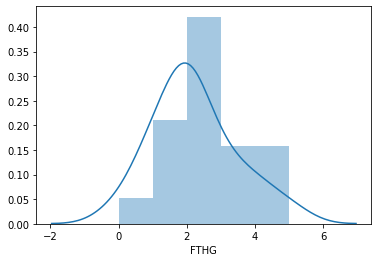

In [122]:
#Lest's see the goals distribution for Arsenal.
ax = sns.distplot(df_ars["FTHG"])

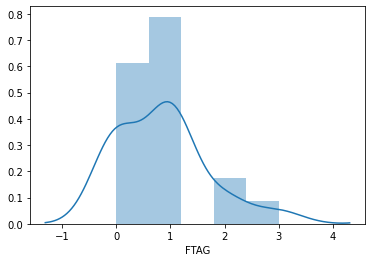

In [123]:
#Let's see the goals distribution for the contrincants.
ax = sns.distplot(df_ars["FTAG"])

In [124]:
#"Let's try to find out what is the outcome of the match according to the result at the half time."
df_ars.groupby(['HTR'])['FTR'].value_counts(normalize=True)

HTR  FTR
A    A      0.500000
     D      0.250000
     H      0.250000
D    H      0.857143
     D      0.142857
H    H      0.875000
     D      0.125000
Name: FTR, dtype: float64

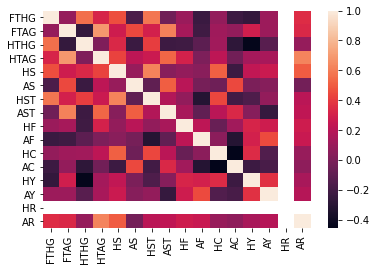

In [125]:
#We try to understand what variables are more correlated to the full time result.
sns.heatmap(df_ars.corr())

In [150]:
#We encode our only categoric feature.
df_ars['HTR'].replace(to_replace=['A','D', "H"], value=[0,1,2],inplace=True)
df_ars.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
7,E0,2018-12-08,Arsenal,Man City,0,2,A,0,1,0,...,3,8,11,14,2,9,2,2,0,0
20,E0,2018-08-25,Arsenal,West Ham,3,1,H,1,1,1,...,10,5,16,13,10,2,1,3,0,0
58,E0,2018-09-23,Arsenal,Everton,2,0,H,0,0,1,...,5,6,17,12,5,9,2,1,0,0
60,E0,2018-09-29,Arsenal,Watford,2,0,H,0,0,1,...,2,4,11,17,6,6,2,2,0,0
89,E0,2018-10-22,Arsenal,Leicester,3,1,H,1,1,1,...,6,2,10,10,6,4,2,2,0,0


In [151]:
#We select the features we are going to use for our classification.
Feature = df_ars[['FTHG','FTAG','HTHG','HTAG','HTR', "HS", "AS", "HST", "AST", "HF", "AF", "HC", "AC", "HY", "AY", "HR", "AR"]]


In [152]:
X = Feature
X[0:5]

,FTHG,FTAG,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
7,0,2,0,1,0,9,17,3,8,11,14,2,9,2,2,0,0
20,3,1,1,1,1,17,13,10,5,16,13,10,2,1,3,0,0
58,2,0,0,0,1,9,9,5,6,17,12,5,9,2,1,0,0
60,2,0,0,0,1,9,13,2,4,11,17,6,6,2,2,0,0
89,3,1,1,1,1,19,8,6,2,10,10,6,4,2,2,0,0


In [153]:
#We select our target feature.
y = df_ars['FTR'].values
y[0:5]

array(['A', 'H', 'H', 'H', 'H'], dtype=object)

In [154]:
#Correlation matrix
merge = pd.concat([X, df_ars['FTR']], axis=1, sort=False)
merge.head()
merge.corr(method='pearson')

,FTHG,FTAG,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
FTHG,1.000000,0.088460,0.558206,0.321591,0.296301,0.461323,-0.170031,0.579283,-0.037703,0.106227,-0.233518,0.081782,-0.227783,-0.262865,0.108791,NaN,0.352791
FTAG,0.088460,1.000000,-0.253267,0.687184,-0.623263,0.281048,0.447775,0.300952,0.615566,0.141351,-0.215302,0.123561,0.083495,0.290289,0.106792,NaN,0.336123
HTHG,0.558206,-0.253267,1.000000,0.013135,0.678466,0.337021,-0.230647,0.413214,-0.220984,-0.216104,-0.107205,0.128618,-0.280051,-0.442950,-0.121456,NaN,0.086881
HTAG,0.321591,0.687184,0.013135,1.000000,-0.660801,0.425939,0.225691,0.267888,0.529601,0.308919,0.005889,0.221627,-0.035009,0.136313,0.146772,NaN,0.629941
HTR,0.296301,-0.623263,0.678466,-0.660801,1.000000,0.018893,-0.391721,0.213133,-0.519009,-0.370738,-0.148677,0.001109,-0.269899,-0.312701,-0.113151,NaN,-0.372326
HS,0.461323,0.281048,0.337021,0.425939,0.018893,1.000000,0.093752,0.619830,0.040585,0.078904,0.048271,0.512086,-0.224495,0.232694,0.269760,NaN,0.500172
AS,-0.170031,0.447775,-0.230647,0.225691,-0.391721,0.093752,1.000000,-0.097576,0.506333,0.207852,-0.016471,-0.046292,0.442473,0.001550,0.034211,NaN,-0.026104
HST,0.579283,0.300952,0.413214,0.267888,0.213133,0.619830,-0.097576,1.000000,0.184820,0.077828,-0.313253,0.437576,-0.203253,-0.155315,0.079266,NaN,0.209794
AST,-0.037703,0.615566,-0.220984,0.529601,-0.519009,0.040585,0.506333,0.184820,1.000000,0.149482,-0.091161,0.214447,0.338216,0.037603,-0.249001,NaN,0.231553
HF,0.106227,0.141351,-0.216104,0.308919,-0.370738,0.078904,0.207852,0.077828,0.149482,1.000000,0.223006,-0.069299,0.123704,0.317521,0.279756,NaN,0.282271


In [155]:
#We divide our data into training an test sets.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("X_train size is ", X_train.shape, "\n", "X_test size is ", X_test.shape, "\n",
      "y_train size is ", y_train.shape, "\n", "y_test size is ", y_test.shape)
print(X_train[0:5])
y_train[0:5]

X_train size is  (15, 17) 
 X_test size is  (4, 17) 
 y_train size is  (15,) 
 y_test size is  (4,)
     FTHG  FTAG  HTHG  HTAG  HTR  HS  AS  HST  AST  HF  AF  HC  AC  HY  AY  \
89      3     1     1     1    1  19   8    6    2  10  10   6   4   2   2   
7       0     2     0     1    0   9  17    3    8  11  14   2   9   2   2   
313     2     0     1     0    2   7   3    4    1  11  10   6   2   2   0   
267     2     0     2     0    2  12  10    4    4   7  14   6   4   0   0   
220     2     0     2     0    2  13  13    5    1  13  15   5   6   0   2   

     HR  AR  
89    0   0  
7     0   0  
313   0   0  
267   0   0  
220   0   0  


array(['H', 'A', 'H', 'H', 'H'], dtype=object)

In [156]:
#Standarize the data of our features.
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.8489469 ,  1.42604819, -1.03209369,  0.97995789, -1.57964649,
        -1.11342035,  1.46741795, -0.93819419,  1.93960198, -0.16086825,
         0.16524976, -1.45388401,  1.92123252, -0.07463934,  0.        ,
         0.        , -0.23570226],
       [ 0.66033818,  0.19446112,  0.36860489,  0.97995789, -0.27472113,
         0.87763722,  0.41530697,  2.26128855,  0.50379272,  1.53718551,
        -0.14872478,  1.00156454, -0.98244845, -0.78371304,  0.82375447,
         0.        , -0.23570226],
       [-0.17609018, -1.03712596, -1.03209369, -0.71269665, -0.27472113,
        -1.11342035, -0.63680402, -0.02405626,  0.98239581,  1.87679626,
        -0.46269932, -0.5330908 ,  1.92123252, -0.07463934, -0.82375447,
         0.        , -0.23570226],
       [-0.17609018, -1.03712596, -1.03209369, -0.71269665, -0.27472113,
        -1.11342035,  0.41530697, -1.39526315,  0.02518964, -0.16086825,
         1.10717337, -0.22615973,  0.67679782, -0.07463934,  0.        ,
         0.        

In [157]:
# also need to normalize the test and train dataset
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_train[0:5]
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))

X_test[0:5]

array([[-1.73205081, -0.22941573,  0.        ,  1.        , -1.        ,
        -0.65465367, -1.09544512, -0.4472136 ,  0.2773501 , -1.36277029,
         0.76834982,  1.45010473, -1.21267813, -0.90453403,  0.        ,
         0.        ,  0.        ],
       [ 0.57735027, -1.14707867,  0.        , -1.        ,  1.        ,
        -1.09108945, -0.73029674, -1.34164079, -0.2773501 , -0.52414242,
         1.20740686, -0.48336824,  0.72760688, -0.90453403,  0.        ,
         0.        ,  0.        ],
       [ 0.57735027,  1.60591014,  0.        ,  1.        , -1.        ,
         0.21821789,  0.36514837,  1.34164079,  1.38675049,  1.15311332,
        -0.98787834,  0.29002095, -0.72760688,  1.50755672, -1.41421356,
         0.        ,  0.        ],
       [ 0.57735027, -0.22941573,  0.        , -1.        ,  1.        ,
         1.52752523,  1.46059349,  0.4472136 , -1.38675049,  0.73379939,
        -0.98787834, -1.25675744,  1.21267813,  0.30151134,  1.41421356,
         0.        

Now we will try to determine which classificator fits the best for our exercise.


Kneighbors Classifier

Test set Accuracy at k= 1 :  [0.  0.  0.5]
Test set Accuracy at k= 2 :  [0.  0.  0.5]
Test set Accuracy at k= 3 :  [0.  0.  0.5]
Test set Accuracy at k= 4 :  [0.  0.  0.5]
Test set Accuracy at k= 5 :  [0.  0.  0.5]
Test set Accuracy at k= 6 :  [0.  0.  0.5]
Test set Accuracy at k= 7 :  [0.  0.  0.5]
Test set Accuracy at k= 8 :  [0.  0.  0.5]
Test set Accuracy at k= 9 :  [0.  0.  0.5]


Text(0, 0.5, 'Testing Accuracy')

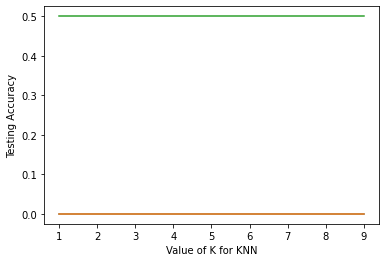

In [158]:
# finding a suitable k value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score
import matplotlib.pyplot as plt
%matplotlib inline

k_range = range(1, 10)
accuracy_score = []
for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    # perform the test
    knn_yhat = KNN.predict(X_test)
    print("Test set Accuracy at k=", k, ": ", jaccard_score(y_test, knn_yhat, average=None))
    accuracy_score.append(jaccard_score(y_test, knn_yhat, average=None))

# plot the relationship between K and testing accuracy
plt.plot(k_range, accuracy_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [159]:
# for KNN
from sklearn.neighbors import KNeighborsClassifier
# perform the test
KNN = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
KNN

KNeighborsClassifier(n_neighbors=7)

Decision Tree Classifier

In [160]:
# findinng the best depth level
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

# Compare accuracy result for depth = 3, 4 and 5
d_range = range(3, 6)
f1 = []
ja = []
for d in d_range:
    DT = DecisionTreeClassifier(criterion="entropy", max_depth=d)
    DT.fit(X_train, y_train)
    dt_yhat = DT.predict(X_test)
    f1.append(f1_score(y_test, dt_yhat, average='weighted'))
    ja.append(jaccard_score(y_test, dt_yhat, average = "weighted"))

result = pd.DataFrame(f1, index=['d=3','d=4', 'd=5'])
result.columns = ['F1-score']
result.insert(loc=1, column='Jacard', value=ja)
result.columns.name = "Depth"
result

Depth,F1-score,Jacard
d=3,0.65,0.583333
d=4,0.65,0.583333
d=5,0.65,0.583333


In [161]:
# for Decision Trees
from sklearn.tree import DecisionTreeClassifier
# prepare DT setting
DT = DecisionTreeClassifier(criterion="entropy", max_depth=5)
# perform the test
clft= DT.fit(X_train, y_train)
clft

DecisionTreeClassifier(criterion='entropy', max_depth=5)

Support Vector Machine

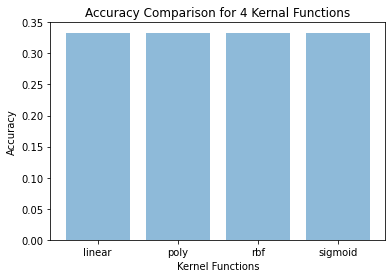

In [162]:
# for SVM
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
%matplotlib inline

func_list = ['linear', 'poly', 'rbf', 'sigmoid']
accuracy_score = []

for func in func_list:
    SVM = svm.SVC(kernel=func)
    SVM.fit(X_train, y_train)
    svm_yhat = SVM.predict(X_test)
    accuracy_score.append(f1_score(y_test, svm_yhat, average='weighted'))
    
# plot the comparison among 4 kernel functions
import numpy as np
import matplotlib.pyplot as plt
y_pos = np.arange(len(func_list))
plt.bar(y_pos, accuracy_score, align='center', alpha=0.5)
plt.xticks(y_pos, func_list)
plt.ylabel('Accuracy')
plt.xlabel('Kernel Functions')
plt.title('Accuracy Comparison for 4 Kernal Functions')
plt.show()

In [163]:
# for SVM
from sklearn import svm
# prepare SVM setting
SVM = svm.SVC(kernel='rbf')
# perform the test
SVM.fit(X_train, y_train)
SVM

SVC()

Logistic Regression

Test  0 : Accuracy at c = 0.1 solver= newton-cg is :  1.1768582256350235
Test  1 : Accuracy at c = 0.1 solver= lbfgs is :  1.1768638161782616
Test  2 : Accuracy at c = 0.1 solver= liblinear is :  0.9365420014907321
Test  3 : Accuracy at c = 0.1 solver= sag is :  1.1756018135317103
Test  4 : Accuracy at c = 0.1 solver= saga is :  1.1698952449073354
Test  5 : Accuracy at c = 0.01 solver= newton-cg is :  1.2527133650475561
Test  6 : Accuracy at c = 0.01 solver= lbfgs is :  1.2527138578422008
Test  7 : Accuracy at c = 0.01 solver= liblinear is :  1.0692918270467273
Test  8 : Accuracy at c = 0.01 solver= sag is :  1.2512560514212558
Test  9 : Accuracy at c = 0.01 solver= saga is :  1.24638492577792
Test  10 : Accuracy at c = 0.001 solver= newton-cg is :  1.2876574952052018
Test  11 : Accuracy at c = 0.001 solver= lbfgs is :  1.287668723529664
Test  12 : Accuracy at c = 0.001 solver= liblinear is :  1.0954088973098468
Test  13 : Accuracy at c = 0.001 solver= sag is :  1.27215666778505
Test  

Text(0, 0.5, 'Testing Accuracy')

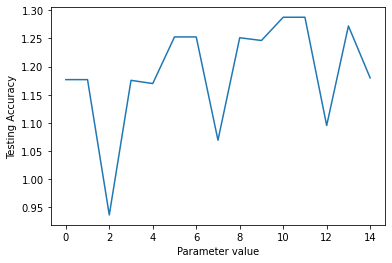

In [164]:
# for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
%matplotlib inline

c_list = [0.1, 0.01, 0.001]
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
idx = []

accuracy_score = []
for idx1, c in enumerate(c_list):
    for idx2, sol in enumerate(solver_list):
        idx.append(idx2 + idx1 * 5)
        # perform the test
        LR = LogisticRegression(C=c, solver=sol).fit(X_train, y_train)
        # it can predict the outcome
        lr_yhat = LR.predict(X_test)
        lr_prob = LR.predict_proba(X_test)
        print("Test ", (idx2 + idx1 * 5), ": Accuracy at c =", c,"solver=", sol,
              "is : ", log_loss(y_test, lr_prob))
        accuracy_score.append(log_loss(y_test, lr_prob))
lr_prob = LR.predict_proba(X_test)
log_loss(y_test, lr_prob)
# plot the relationship between K and testing accuracy
plt.plot(idx, accuracy_score)
plt.xlabel('Parameter value')
plt.ylabel('Testing Accuracy')

In [165]:
# for Logistic Regression
from sklearn.linear_model import LogisticRegression
# prepare LR setting
LR = LogisticRegression(C=0.001, solver='lbfgs').fit(X_train, y_train)
LR

LogisticRegression(C=0.001)

We start our evaluation.

In [166]:
# Jaccard setup
from sklearn.metrics import jaccard_score

# evaluate KNN
knn_yhat = KNN.predict(X_test)
jc1 = round(jaccard_score(y_test, knn_yhat, average = "weighted"), 2)
# evaluate Decision Trees
dt_yhat = DT.predict(X_test)
jc2 = round(jaccard_score(y_test, dt_yhat, average = "weighted"), 2)
#evaluate SVM
svm_yhat = SVM.predict(X_test)
jc3 = round(jaccard_score(y_test, svm_yhat, average = "weighted"), 2)
# evaluate Logistic Regression
lr_yhat = LR.predict(X_test)
jc4 = round(jaccard_score(y_test, lr_yhat, average = "weighted"), 2)

list_jc = [jc1, jc2, jc3, jc4]
list_jc

[0.25, 0.58, 0.25, 0.25]

In [167]:
# F1-score setup
from sklearn.metrics import f1_score

# evaluate KNN
fs1 = round(f1_score(y_test, knn_yhat, average='weighted'), 2)
# evaluate Desision Trees 
fs2 = round(f1_score(y_test, dt_yhat, average='weighted'), 2)
# evaluate SVM
fs3 = round(f1_score(y_test, svm_yhat, average='weighted'), 2)
# evaluate Logistic Regression
fs4 = round(f1_score(y_test, lr_yhat, average='weighted'),2 )

list_fs = [fs1, fs2, fs3, fs4]
list_fs

[0.33, 0.65, 0.33, 0.33]

In [168]:
# LogLoss
from sklearn.metrics import log_loss
lr_prob = LR.predict_proba(X_test)
list_ll = ['NA', 'NA', 'NA', round(log_loss(y_test, lr_prob), 2)]
list_ll

['NA', 'NA', 'NA', 1.29]

In [169]:
import pandas as pd

# fomulate the report format
df = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.25,0.33,NA
Decision Tree,0.58,0.65,NA
SVM,0.25,0.33,NA
Logistic Regression,0.25,0.33,1.29


In [ ]:
Finally, we plot our best classification model.

[Text(200.88000000000002, 190.26, 'X[0] <= -0.641\nentropy = 0.906\nsamples = 15\nvalue = [1, 2, 12]'),
 Text(133.92000000000002, 135.9, 'X[9] <= -0.416\nentropy = 1.5\nsamples = 4\nvalue = [1, 2, 1]'),
 Text(66.96000000000001, 81.53999999999999, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(200.88000000000002, 81.53999999999999, 'X[0] <= -1.411\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(133.92000000000002, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(267.84000000000003, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(267.84000000000003, 135.9, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 11]')]

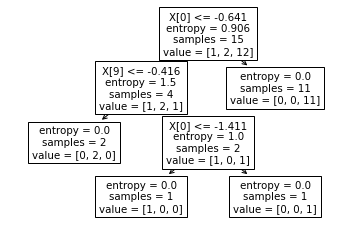

In [170]:
from sklearn import tree
tree.plot_tree(clft)

Now, we will replicate the exercise for the Arsenal games as visit.

In [210]:
df_arsa= df.AwayTeam.str.contains("Arsenal")
df_arsa= df[df_arsa]
df_arsa

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
11,E0,18/08/2018,Chelsea,Arsenal,3,2,H,2,2,D,...,11,6,12,9,5,1,0,2,0,0
38,E0,2/9/18,Cardiff,Arsenal,2,3,A,1,1,D,...,3,11,12,14,3,9,3,4,0,0
44,E0,15/09/2018,Newcastle,Arsenal,1,2,A,0,0,D,...,2,2,13,11,10,4,0,0,0,0
77,E0,7/10/18,Fulham,Arsenal,1,5,A,1,1,D,...,4,7,11,12,4,2,2,0,0,0
97,E0,28/10/2018,Crystal Palace,Arsenal,2,2,D,1,0,H,...,3,2,10,16,6,4,1,2,0,0
127,E0,25/11/2018,Bournemouth,Arsenal,1,2,A,1,1,D,...,5,4,6,9,5,8,2,1,0,0
147,E0,5/12/18,Man United,Arsenal,2,2,D,1,1,D,...,7,4,13,10,4,4,3,3,0,0
169,E0,16/12/2018,Southampton,Arsenal,3,2,H,2,1,H,...,7,4,12,10,4,5,3,1,0,0
180,E0,26/12/2018,Brighton,Arsenal,1,1,D,1,1,D,...,3,4,10,4,4,9,2,1,0,0
193,E0,29/12/2018,Liverpool,Arsenal,5,1,H,4,1,H,...,10,2,8,13,5,3,1,2,0,0


In [172]:
df_arsa['Date'] = pd.to_datetime(df_arsa['Date'])
df_arsa.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
11,E0,2018-08-18,Chelsea,Arsenal,3,2,H,2,2,D,...,11,6,12,9,5,1,0,2,0,0
38,E0,2018-02-09,Cardiff,Arsenal,2,3,A,1,1,D,...,3,11,12,14,3,9,3,4,0,0
44,E0,2018-09-15,Newcastle,Arsenal,1,2,A,0,0,D,...,2,2,13,11,10,4,0,0,0,0
77,E0,2018-07-10,Fulham,Arsenal,1,5,A,1,1,D,...,4,7,11,12,4,2,2,0,0,0
97,E0,2018-10-28,Crystal Palace,Arsenal,2,2,D,1,0,H,...,3,2,10,16,6,4,1,2,0,0


In [173]:
df_arsa['FTR'].value_counts()

H    8
A    7
D    4
Name: FTR, dtype: int64

In [174]:
df_ha = pd.DataFrame([df_ars['FTR'].value_counts(), df_arsa['FTR'].value_counts()])
df_ha

,H,D,A
FTR,14,3,2
FTR,8,4,7


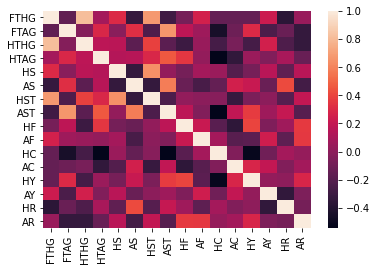

In [211]:
sns.heatmap(df_arsa.corr())

In [212]:
df_arsa['HTR'].replace(to_replace=['A','D', "H"], value=[0,1,2],inplace=True)
df_arsa.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
11,E0,18/08/2018,Chelsea,Arsenal,3,2,H,2,2,1,...,11,6,12,9,5,1,0,2,0,0
38,E0,2/9/18,Cardiff,Arsenal,2,3,A,1,1,1,...,3,11,12,14,3,9,3,4,0,0
44,E0,15/09/2018,Newcastle,Arsenal,1,2,A,0,0,1,...,2,2,13,11,10,4,0,0,0,0
77,E0,7/10/18,Fulham,Arsenal,1,5,A,1,1,1,...,4,7,11,12,4,2,2,0,0,0
97,E0,28/10/2018,Crystal Palace,Arsenal,2,2,D,1,0,2,...,3,2,10,16,6,4,1,2,0,0


In [213]:
Feature = df_arsa[['FTHG','FTAG','HTHG','HTAG','HTR', "HS", "AS", "HST", "AST", "HF", "AF", "HC", "AC", "HY", "AY", "HR", "AR"]]


In [214]:
X = Feature
X[0:5]

,FTHG,FTAG,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
11,3,2,2,2,1,24,15,11,6,12,9,5,1,0,2,0,0
38,2,3,1,1,1,14,17,3,11,12,14,3,9,3,4,0,0
44,1,2,0,0,1,4,12,2,2,13,11,10,4,0,0,0,0
77,1,5,1,1,1,21,9,4,7,11,12,4,2,2,0,0,0
97,2,2,1,0,2,16,7,3,2,10,16,6,4,1,2,0,0


In [215]:
y = df_arsa['FTR'].values
y[0:5]

array(['H', 'A', 'A', 'A', 'D'], dtype=object)

In [216]:
merge = pd.concat([X, df_arsa['FTR']], axis=1, sort=False)
merge.head()
merge.corr(method='pearson')

,FTHG,FTAG,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
FTHG,1.000000,-0.155070,0.817034,0.084788,0.629941,0.301218,-0.325006,0.676668,-0.281255,-0.074632,0.261647,-0.142402,-0.144128,-0.145119,0.230007,-0.367465,0.045835
FTAG,-0.155070,1.000000,-0.025650,0.291809,-0.126239,-0.008001,0.320956,-0.224065,0.667252,0.179293,0.062950,-0.442944,-0.112977,0.301858,-0.236477,-0.126239,-0.329137
HTHG,0.817034,-0.025650,1.000000,0.170431,0.703624,0.166937,-0.170797,0.390303,-0.175617,-0.297763,0.042117,-0.260943,-0.068520,-0.260701,0.258046,-0.225762,-0.328532
HTAG,0.084788,0.291809,0.170431,1.000000,-0.396639,0.139295,0.151931,0.292724,0.459712,0.350837,0.027465,-0.542961,-0.342473,0.047782,-0.040877,0.097534,-0.127740
HTR,0.629941,-0.126239,0.703624,-0.396639,1.000000,0.241784,-0.351855,0.290699,-0.410849,-0.501178,0.009126,0.126679,0.122785,-0.298086,0.264584,-0.407407,-0.336855
HS,0.301218,-0.008001,0.166937,0.139295,0.241784,1.000000,-0.330958,0.646078,0.029389,-0.081422,0.086924,0.050112,-0.206720,-0.073518,0.156961,-0.159624,0.157136
AS,-0.325006,0.320956,-0.170797,0.151931,-0.351855,-0.330958,1.000000,-0.328385,0.583797,-0.126517,-0.251452,-0.143999,0.257118,0.211207,-0.126532,0.416163,-0.270718
HST,0.676668,-0.224065,0.390303,0.292724,0.290699,0.646078,-0.328385,1.000000,-0.232715,0.020400,-0.003786,-0.018125,-0.316797,-0.055119,0.001464,-0.195934,0.192879
AST,-0.281255,0.667252,-0.175617,0.459712,-0.410849,0.029389,0.583797,-0.232715,1.000000,0.169948,-0.038164,-0.542873,0.189131,0.372244,0.062354,0.204572,-0.197224
HF,-0.074632,0.179293,-0.297763,0.350837,-0.501178,-0.081422,-0.126517,0.020400,0.169948,1.000000,0.217387,-0.184064,-0.351911,0.398758,-0.047133,0.071370,0.366969


In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("X_train size is ", X_train.shape, "\n", "X_test size is ", X_test.shape, "\n",
      "y_train size is ", y_train.shape, "\n", "y_test size is ", y_test.shape)
print(X_train[0:5])
y_train[0:5]

X_train size is  (15, 17) 
 X_test size is  (4, 17) 
 y_train size is  (15,) 
 y_test size is  (4,)
     FTHG  FTAG  HTHG  HTAG  HTR  HS  AS  HST  AST  HF  AF  HC  AC  HY  AY  \
97      2     2     1     0    2  16   7    3    2  10  16   6   4   1   2   
11      3     2     2     2    1  24  15   11    6  12   9   5   1   0   2   
349     3     1     3     0    2  11  11    3    1  12   9   5   5   2   3   
283     1     1     0     1    0  10   9    3    4  15  14   3   4   3   2   
248     3     1     2     1    2  19   4   12    2  11   8   4   2   1   1   

     HR  AR  
97    0   0  
11    0   0  
349   0   0  
283   0   1  
248   0   0  


array(['D', 'H', 'H', 'D', 'H'], dtype=object)

In [218]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.97995789,  0.31242529,  0.86204366,  1.98625413, -0.23570226,
         1.78270583,  0.87696808,  1.64625295,  0.86792607,  0.30279868,
        -0.3816409 , -0.16679542, -1.43073272, -1.52585428,  0.26940795,
        -0.23570226, -0.34299717],
       [ 0.13363062,  1.16043679, -0.04789131,  0.41380294, -0.23570226,
        -0.10955175,  1.32129857, -0.83127624,  2.9292505 ,  0.30279868,
         1.19470196, -1.22316639,  1.91498072,  0.8247861 ,  1.97565832,
        -0.23570226, -0.34299717],
       [-0.71269665,  0.31242529, -0.95782629, -1.15864824, -0.23570226,
        -2.00180934,  0.21047234, -1.14096739, -0.78113347,  0.68634368,
         0.24889624,  2.47413201, -0.17609018, -1.52585428, -1.43684242,
        -0.23570226, -0.34299717],
       [-0.71269665,  2.85645979, -0.04789131,  0.41380294, -0.23570226,
         1.21502855, -0.4560234 , -0.52158509,  1.28019096, -0.08074632,
         0.56416481, -0.6949809 , -1.01251854,  0.0412393 , -1.43684242,
        -0.23570226

In [219]:
# also need to normalize the test and train dataset
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_train[0:5]
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_test[0:5]

array([[ 0.30151134, -0.14002801,  1.        ,  0.        ,  0.57735027,
        -1.38675049,  0.57735027, -0.08481889,  0.        , -0.22941573,
        -1.60591014, -0.76249285,  0.4472136 ,  0.57735027,  1.34164079,
         0.        , -0.57735027],
       [-0.90453403,  1.54030809,  1.        ,  0.        ,  0.57735027,
         0.64715023,  0.57735027, -1.10264561,  1.41421356, -1.14707867,
         0.22941573, -0.76249285, -0.4472136 , -1.73205081, -1.34164079,
         0.        , -0.57735027],
       [ 1.50755672, -1.26025208, -1.        , -1.41421356,  0.57735027,
         1.20185043, -1.73205081,  1.61155897, -1.41421356, -0.22941573,
         1.14707867,  1.67748427,  1.34164079,  0.57735027, -0.4472136 ,
         0.        ,  1.73205081],
       [-0.90453403, -0.14002801, -1.        ,  1.41421356, -1.73205081,
        -0.46225016,  0.57735027, -0.42409446,  0.        ,  1.60591014,
         0.22941573, -0.15249857, -1.34164079,  0.57735027,  0.4472136 ,
         0.        

Test set Accuracy at k= 1 :  [0.5        0.         0.33333333]
Test set Accuracy at k= 2 :  [1. 0. 0.]
Test set Accuracy at k= 3 :  [1.  0.  0.5]
Test set Accuracy at k= 4 :  [0.  0.  0.5]
Test set Accuracy at k= 5 :  [0. 0. 1.]
Test set Accuracy at k= 6 :  [0.   0.   0.25]
Test set Accuracy at k= 7 :  [0.   0.   0.25]
Test set Accuracy at k= 8 :  [0.5        0.         0.33333333]
Test set Accuracy at k= 9 :  [0.5        0.         0.33333333]


Text(0, 0.5, 'Testing Accuracy')

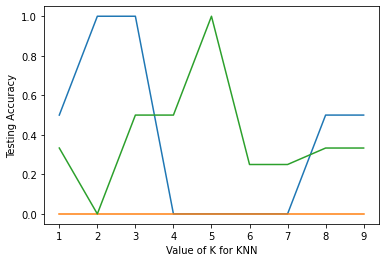

In [220]:
# finding a suitable k value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score
import matplotlib.pyplot as plt
%matplotlib inline

k_range = range(1, 10)
accuracy_score = []
for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    # perform the test
    knn_yhat = KNN.predict(X_test)
    print("Test set Accuracy at k=", k, ": ", jaccard_score(y_test, knn_yhat, average=None))
    accuracy_score.append(jaccard_score(y_test, knn_yhat, average=None))

# plot the relationship between K and testing accuracy
plt.plot(k_range, accuracy_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [221]:
# for KNN
from sklearn.neighbors import KNeighborsClassifier
# perform the test
KNN = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train)
KNN

KNeighborsClassifier(n_neighbors=2)

In [222]:
# findinng the best depth level
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

# Compare accuracy result for depth = 3, 4 and 5
d_range = range(3, 6)
f1 = []
ja = []
for d in d_range:
    DT = DecisionTreeClassifier(criterion="entropy", max_depth=d)
    DT.fit(X_train, y_train)
    dt_yhat = DT.predict(X_test)
    f1.append(f1_score(y_test, dt_yhat, average='weighted'))
    ja.append(jaccard_score(y_test, dt_yhat, average = "weighted"))

result = pd.DataFrame(f1, index=['d=3','d=4', 'd=5'])
result.columns = ['F1-score']
result.insert(loc=1, column='Jacard', value=ja)
result.columns.name = "Depth"
result

Depth,F1-score,Jacard
d=3,0.100,0.062500
d=4,0.375,0.333333
d=5,0.000,0.000000


In [223]:
# for Decision Trees
from sklearn.tree import DecisionTreeClassifier
# prepare DT setting
DT = DecisionTreeClassifier(criterion="entropy", max_depth=4)
# perform the test
clft= DT.fit(X_train, y_train)
clft

DecisionTreeClassifier(criterion='entropy', max_depth=4)

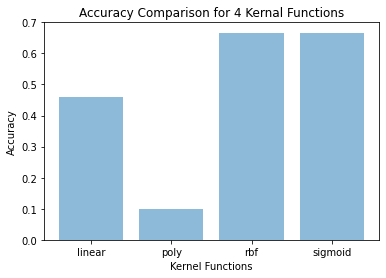

In [224]:
# for SVM
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
%matplotlib inline

func_list = ['linear', 'poly', 'rbf', 'sigmoid']
accuracy_score = []

for func in func_list:
    SVM = svm.SVC(kernel=func)
    SVM.fit(X_train, y_train)
    svm_yhat = SVM.predict(X_test)
    accuracy_score.append(f1_score(y_test, svm_yhat, average='weighted'))
    
# plot the comparison among 4 kernel functions
import numpy as np
import matplotlib.pyplot as plt
y_pos = np.arange(len(func_list))
plt.bar(y_pos, accuracy_score, align='center', alpha=0.5)
plt.xticks(y_pos, func_list)
plt.ylabel('Accuracy')
plt.xlabel('Kernel Functions')
plt.title('Accuracy Comparison for 4 Kernal Functions')
plt.show()

In [225]:
# for SVM
from sklearn import svm
# prepare SVM setting
SVM = svm.SVC(kernel='rbf')
# perform the test
SVM.fit(X_train, y_train)
SVM

SVC()

Test  0 : Accuracy at c = 0.1 solver= newton-cg is :  0.976911438176296
Test  1 : Accuracy at c = 0.1 solver= lbfgs is :  0.9769077408599538
Test  2 : Accuracy at c = 0.1 solver= liblinear is :  0.9611040296223794
Test  3 : Accuracy at c = 0.1 solver= sag is :  0.9769116279156997
Test  4 : Accuracy at c = 0.1 solver= saga is :  0.9764579108439202
Test  5 : Accuracy at c = 0.01 solver= newton-cg is :  1.0699895923379548
Test  6 : Accuracy at c = 0.01 solver= lbfgs is :  1.0699906453604398
Test  7 : Accuracy at c = 0.01 solver= liblinear is :  1.0570132473150786
Test  8 : Accuracy at c = 0.01 solver= sag is :  1.0699678985880043
Test  9 : Accuracy at c = 0.01 solver= saga is :  1.069944929943342
Test  10 : Accuracy at c = 0.001 solver= newton-cg is :  1.1323091250114061
Test  11 : Accuracy at c = 0.001 solver= lbfgs is :  1.1323082053033673
Test  12 : Accuracy at c = 0.001 solver= liblinear is :  1.0935822798162471
Test  13 : Accuracy at c = 0.001 solver= sag is :  1.1319695856559622
Tes

Text(0, 0.5, 'Testing Accuracy')

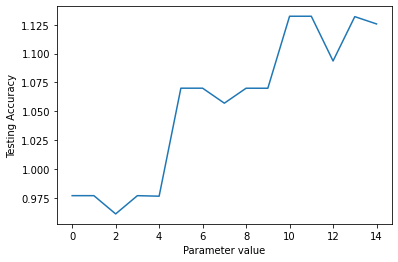

In [226]:
# for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
%matplotlib inline

c_list = [0.1, 0.01, 0.001]
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
idx = []

accuracy_score = []
for idx1, c in enumerate(c_list):
    for idx2, sol in enumerate(solver_list):
        idx.append(idx2 + idx1 * 5)
        # perform the test
        LR = LogisticRegression(C=c, solver=sol).fit(X_train, y_train)
        # it can predict the outcome
        lr_yhat = LR.predict(X_test)
        lr_prob = LR.predict_proba(X_test)
        print("Test ", (idx2 + idx1 * 5), ": Accuracy at c =", c,"solver=", sol,
              "is : ", log_loss(y_test, lr_prob))
        accuracy_score.append(log_loss(y_test, lr_prob))
lr_prob = LR.predict_proba(X_test)
log_loss(y_test, lr_prob)
# plot the relationship between K and testing accuracy
plt.plot(idx, accuracy_score)
plt.xlabel('Parameter value')
plt.ylabel('Testing Accuracy')

In [227]:
# for KNN
from sklearn.neighbors import KNeighborsClassifier
# perform the test
KNN = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train)
KNN

KNeighborsClassifier(n_neighbors=10)

In [232]:
# for Logistic Regression
from sklearn.linear_model import LogisticRegression
# prepare LR setting
LR = LogisticRegression(C=0.001, solver='lbfgs').fit(X_train, y_train)
LR

LogisticRegression(C=0.001)

In [233]:
# Jaccard setup
from sklearn.metrics import jaccard_score

# evaluate KNN
knn_yhat = KNN.predict(X_test)
jc1 = round(jaccard_score(y_test, knn_yhat, average = "weighted"), 2)
# evaluate Decision Trees
dt_yhat = DT.predict(X_test)
jc2 = round(jaccard_score(y_test, dt_yhat, average = "weighted"), 2)
#evaluate SVM
svm_yhat = SVM.predict(X_test)
jc3 = round(jaccard_score(y_test, svm_yhat, average = "weighted"), 2)
# evaluate Logistic Regression
lr_yhat = LR.predict(X_test)
jc4 = round(jaccard_score(y_test, lr_yhat, average = "weighted"), 2)

list_jc = [jc1, jc2, jc3, jc4]
list_jc

[0.33, 0.33, 0.62, 0.06]

In [234]:
# F1-score setup
from sklearn.metrics import f1_score

# evaluate KNN
fs1 = round(f1_score(y_test, knn_yhat, average='weighted'), 2)
# evaluate Desision Trees 
fs2 = round(f1_score(y_test, dt_yhat, average='weighted'), 2)
# evaluate SVM
fs3 = round(f1_score(y_test, svm_yhat, average='weighted'), 2)
# evaluate Logistic Regression
fs4 = round(f1_score(y_test, lr_yhat, average='weighted'),2 )

list_fs = [fs1, fs2, fs3, fs4]
list_fs

[0.46, 0.38, 0.67, 0.1]

In [235]:
# LogLoss
from sklearn.metrics import log_loss
lr_prob = LR.predict_proba(X_test)
list_ll = ['NA', 'NA', 'NA', round(log_loss(y_test, lr_prob), 2)]
list_ll

['NA', 'NA', 'NA', 1.13]

In [236]:
import pandas as pd

# fomulate the report format
df = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.33,0.46,NA
Decision Tree,0.33,0.38,NA
SVM,0.62,0.67,NA
Logistic Regression,0.06,0.10,1.13


Now that we have tools to have a better idea of when Arsenal have better chances of having a good performance, lets see the location of all the England Stadiums. Also, we will provide you with information regarding hotels, bus and metro stations and restaurants so that you can enjoy better your visit.

In [192]:
#We load the dataset of the stadiums locations.
locations = pd.read_csv("stadiums_20150302.csv")
locations

,Team,FDCOUK,City,Stadium,Capacity,Latitude,Longitude,Country
0,Arsenal,Arsenal,London,Emirates Stadium,60361,51.555000,-0.108611,England
1,Aston Villa,Aston Villa,Birmingham,Villa Park,42785,52.509167,-1.884722,England
2,Blackburn Rovers,Blackburn,Blackburn,Ewood Park,31154,53.728611,-2.489167,England
3,Bolton Wanderers,Bolton,Bolton,Reebok Stadium,28100,53.580556,-2.535556,England
4,Chelsea,Chelsea,London,Stamford Bridge,42449,51.481667,-0.191111,England
...,...,...,...,...,...,...,...,...
67,Colchester United,Colchester,Colchester,Colchester Community Stadium,10105,51.923394,0.897703,England
68,Scunthorpe United,Scunthorpe,Scunthorpe,Glanford Park,9088,53.586725,-0.695266,England
69,A.F.C. Bournemouth,Bournemouth,Bournemouth,Goldsands Stadium,12000,50.735277,-1.838330,England
70,Yeovil Town,Yeovil,Yeovil,Huish Park,9565,50.950270,-2.674880,England


In [200]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print("Libraries Imported!")

address = 'England'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of England are {}, {}.'.format(latitude, longitude))

Libraries Imported!
The geograpical coordinate of England are 52.7954791, -0.5402402866174321.


In [193]:
# create map of Toronto using latitude and longitude values
map_eng = folium.Map(location=[latitude, longitude], zoom_start=5)

# add markers to map
for i in range(0,len(locations)):
    folium.Marker([locations.iloc[i]['Latitude'], locations.iloc[i]['Longitude']], popup=locations.iloc[i]       ['Team']).add_to(map_eng)

map_eng

In [195]:
CLIENT_ID = 'W5EMFJDSZXJHR5LY4PDHDSQJTAOLDZWHY4FZQVEU2IUD3A3T' # your Foursquare ID
CLIENT_SECRET = 'NP0XXQ52SXYC2ER2KE4KDGLAZHGJZJTFAV2VHHGHCMQ3N30S' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
radius = 50000
print("search_query + ' .... OK!")

Your credentails:
CLIENT_ID: W5EMFJDSZXJHR5LY4PDHDSQJTAOLDZWHY4FZQVEU2IUD3A3T
CLIENT_SECRET:NP0XXQ52SXYC2ER2KE4KDGLAZHGJZJTFAV2VHHGHCMQ3N30S
search_query + ' .... OK!


In [201]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

url = 'https://api.foursquare.com/v2/venues/search?categoryId=56aa371be4b08b9a8d573520&client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?categoryId=56aa371be4b08b9a8d573520&client_id=W5EMFJDSZXJHR5LY4PDHDSQJTAOLDZWHY4FZQVEU2IUD3A3T&client_secret=NP0XXQ52SXYC2ER2KE4KDGLAZHGJZJTFAV2VHHGHCMQ3N30S&ll=52.7954791,-0.5402402866174321&v=20180604&radius=50000&limit=100'

In [202]:
#Send the GET request and examine the results
results = requests.get(url).json()
results

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress
0,589768470a3d54567e21705a,players home,"[{'id': '56aa371be4b08b9a8d573520', 'name': 'T...",v-1595629943,False,52.620781,-1.143268,"[{'label': 'display', 'lat': 52.620781, 'lng':...",45081,GB,United Kingdom,[United Kingdom]


Information of Tour Providers

In [203]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,id
0,players home,Tour Provider,52.620781,-1.143268,"[{'label': 'display', 'lat': 52.620781, 'lng':...",45081,GB,United Kingdom,[United Kingdom],589768470a3d54567e21705a


Information of Hotels

In [205]:
url = 'https://api.foursquare.com/v2/venues/search?categoryId=4bf58dd8d48988d1fa931735&client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

#Send the GET request and examine the results
results = requests.get(url).json()
results

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,Park Plaza,Hotel,"41 Maid Marian Way, Nottingham",52.952956,-1.153436,"[{'label': 'display', 'lat': 52.952956, 'lng':...",44773,NG1 6GD,GB,Nottingham,Nottinghamshire,United Kingdom,"[41 Maid Marian Way, Nottingham, Nottingham, N...",NaN,NaN,4bcc932ab6c49c7472f89391
1,Holiday Inn Express,Hotel,"Brayford Enterprise Park, Ruston Way",53.225963,-0.551053,"[{'label': 'display', 'lat': 53.22596289759921...",47926,LN6 7DB,GB,Lincoln,Lincolnshire,United Kingdom,"[Brayford Enterprise Park, Ruston Way, Lincoln...",NaN,NaN,4bba0bde53649c74a48948fb
2,Best Western Orton Hall Hotel,Hotel,"The Village,Orton Longueville",52.554027,-0.278955,"[{'label': 'display', 'lat': 52.55402727610075...",32147,PE2 7DN,GB,Cambridgeshire,Cambridgeshire,United Kingdom,"[The Village,Orton Longueville, Cambridgeshire...",NaN,NaN,4bc7927f93bdeee1e28637ae
3,"Radisson Blu Hotel, East Midlands Airport",Hotel,"Herald Way, Pegasus Business Park",52.825237,-1.308500,"[{'label': 'display', 'lat': 52.825237, 'lng':...",51799,DE74 2TZ,GB,East Midlands,NaN,United Kingdom,"[Herald Way, Pegasus Business Park, East Midla...",NaN,NaN,4ebbb4ec5c5c3157fde2f609
4,Crowne Plaza Nottingham,Hotel,Wollaton St,52.955481,-1.153474,"[{'label': 'display', 'lat': 52.9554811, 'lng'...",44885,NG1 5RH,GB,Nottingham,Nottinghamshire,United Kingdom,"[Wollaton St, Nottingham, Nottinghamshire, NG1...",NaN,NaN,4c4dd6a1d667d13adb137f9f


Information of Bus Stations

In [206]:
url = 'https://api.foursquare.com/v2/venues/search?categoryId=4bf58dd8d48988d1fe931735&client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

#Send the GET request and examine the results
results = requests.get(url).json()
results

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,crossStreet,id
0,Mansfield Bus Station,Bus Station,Quaker Way,53.143125,-1.197828,"[{'label': 'display', 'lat': 53.14312477867679...",58661,GB,Mansfield,Nottinghamshire,United Kingdom,"[Quaker Way, Mansfield, Nottinghamshire, Unite...",NaN,NaN,5165a1fae4b0ca7ab790755f
1,Victoria Bus Station,Bus Station,Mansfield Rd.,52.958911,-1.148613,"[{'label': 'display', 'lat': 52.95891120093947...",44738,GB,Nottingham,Nottinghamshire,United Kingdom,"[Mansfield Rd., Nottingham, Nottinghamshire, U...",NaN,NaN,4be452ccbcef2d7fa76202e5
2,Lincoln Central Bus Station,Bus Station,Melville St.,53.226493,-0.538597,"[{'label': 'display', 'lat': 53.226493, 'lng':...",47980,GB,Lincoln,Lincolnshire,United Kingdom,"[Melville St., Lincoln, Lincolnshire, LN5 7FD,...",LN5 7FD,NaN,4b744600f964a520afd12de3
3,Queensgate Bus Station,Bus Station,Queensgate Shopping Centre,52.574695,-0.246425,"[{'label': 'display', 'lat': 52.57469459738859...",31577,GB,Peterborough,Peterborough,United Kingdom,"[Queensgate Shopping Centre, Peterborough, PE1...",PE1 1NT,NaN,4bbdf814f57ba593a0b0aeb9
4,Milton Keynes Coachway,Bus Station,NaN,52.455306,-1.136969,"[{'label': 'display', 'lat': 52.45530622092375...",55315,GB,NaN,NaN,United Kingdom,[United Kingdom],NaN,NaN,4ddf9cf9d22d728b20cb1dca


Information of Metro Stations

In [207]:
url = 'https://api.foursquare.com/v2/venues/search?categoryId=4bf58dd8d48988d1fd931735&client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

#Send the GET request and examine the results
results = requests.get(url).json()
results

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,The Park Tunnel (Derby Road Entrance),Metro Station,Derby Road,52.955212,-1.158468,"[{'label': 'display', 'lat': 52.95521173418335...",45182,NG1,GB,Nottingham,Nottinghamshire,United Kingdom,"[Derby Road, Nottingham, Nottinghamshire, NG1...",5061a921582f48f545adb641
1,A1(M) /A14 Junc14 S/B,Metro Station,NaN,52.380168,-0.255667,"[{'label': 'display', 'lat': 52.38016792233747...",50077,NaN,GB,NaN,NaN,United Kingdom,[United Kingdom],51282a4ce4b0861e5262dbf2
